https://github.com/Sonimon123/MonteCarlo

In [24]:
import numpy as np
import pandas as pd
import MonteCarlo

Scenario 1: 2-Headed Coin

1.1

In [25]:
cArray = np.array(['H', 'T'])

fCoin = MonteCarlo.Die(cArray)
uCoin = MonteCarlo.Die(cArray)

uCoin.setWeight('T', 5)

fCoin.seeDie()

,Face,Weight
0,H,1.0
1,T,1.0


In [26]:
uCoin.seeDie()

,Face,Weight
0,H,1.0
1,T,5.0


1.2 - 1.3

In [27]:
game1 = MonteCarlo.Game([fCoin, fCoin, fCoin])
game1.play(1000)
game2 = MonteCarlo.Game([uCoin, uCoin, fCoin])
game2.play(1000)

1.4

In [28]:
analyzer1 = MonteCarlo.Analyzer(game1)
analyzer1.jackpot()
analyzer1.jackpotDF.value_counts(normalize=True)

Jackpot?
False       0.757
True        0.243
dtype: float64

In [29]:
analyzer2 = MonteCarlo.Analyzer(game2)
analyzer2.jackpot()
analyzer2.jackpotDF.value_counts(normalize=True)

Jackpot?
False       0.632
True        0.368
dtype: float64

1.5

In [30]:
rf1 = analyzer1.jackpot() / 1000
rf2 = analyzer2.jackpot() / 1000

1.6

<AxesSubplot:>

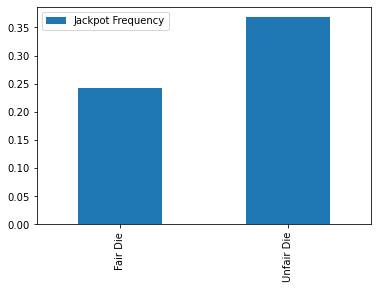

In [31]:
data = {'Jackpot Frequency': [rf1, rf2]}
rfDF = pd.DataFrame(data, index=['Fair Die', 'Unfair Die'])
rfDF.plot.bar()

Scenario 2: 6-Sided die

2.1

In [32]:
dArray = np.array([1,2,3,4,5,6])

fd1 = MonteCarlo.Die(dArray)
ud1 = MonteCarlo.Die(dArray)
ud1.setWeight(6, 5)
ud2 = MonteCarlo.Die(dArray)
ud2.setWeight(1, 5)

In [33]:
fd1.seeDie()

,Face,Weight
0,1,1.0
1,2,1.0
2,3,1.0
3,4,1.0
4,5,1.0
5,6,1.0


In [34]:
ud1.seeDie()

,Face,Weight
0,1,1.0
1,2,1.0
2,3,1.0
3,4,1.0
4,5,1.0
5,6,5.0


In [35]:
ud2.seeDie()

,Face,Weight
0,1,5.0
1,2,1.0
2,3,1.0
3,4,1.0
4,5,1.0
5,6,1.0


2.2

In [36]:
game1 = MonteCarlo.Game([fd1, fd1, fd1, fd1, fd1])
game1.play(10000)

2.3

In [37]:
game2 = MonteCarlo.Game([ud1, ud1, ud2, fd1, fd1])
game2.play(10000)

2.4

In [38]:
analyzer1 = MonteCarlo.Analyzer(game1)
analyzer1.jackpot()
analyzer1.jackpotDF.value_counts(normalize=True)

Jackpot?
False       0.9994
True        0.0006
dtype: float64

In [39]:
analyzer2 = MonteCarlo.Analyzer(game2)
analyzer2.jackpot()
analyzer2.jackpotDF.value_counts(normalize=True)

Jackpot?
False       0.9989
True        0.0011
dtype: float64

<AxesSubplot:>

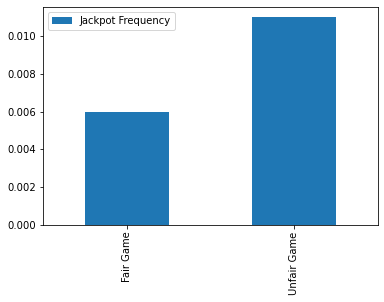

In [40]:
rf1 = analyzer1.jackpot() / 1000
rf2 = analyzer2.jackpot() / 1000

data = {'Jackpot Frequency': [rf1, rf2]}
rfDF = pd.DataFrame(data, index=['Fair Game', 'Unfair Game'])
rfDF.plot.bar()

2.5

<AxesSubplot:xlabel='Die 1,Die 2,Die 3,Die 4,Die 5'>

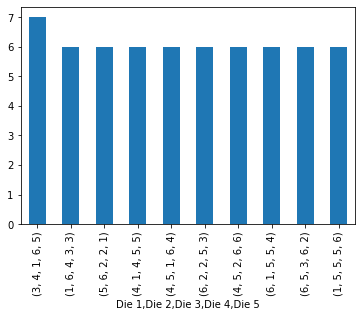

In [41]:
analyzer1.combo()[:10].plot.bar()

<AxesSubplot:xlabel='Die 1,Die 2,Die 3,Die 4,Die 5'>

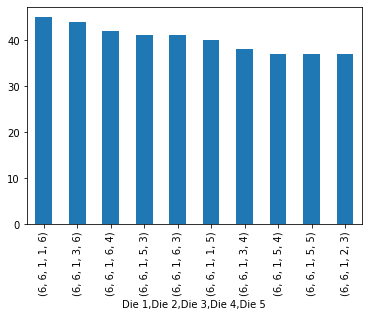

In [42]:
analyzer2.combo()[:10].plot.bar()

Scenario 3: Roman Alphabet

3.1

In [43]:
lArray = np.array(['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z'])
weightArray = np.array([8.4966,2.0720,4.5388,3.3844,11.1607,1.8121,2.4705,3.0034,7.5448,0.1965,1.1016,5.4893,3.0129,6.6544,7.1635,3.1671,0.1962,7.5809,5.7351,6.9509,3.6308,1.0074,1.2899,0.2902,1.7779,0.2722])

lettDie = MonteCarlo.Die(lArray)

for i in range(26):
    lettDie.setWeight(lArray[i], weightArray[i])

lettDie.seeDie()

,Face,Weight
0,A,8.4966
1,B,2.0720
2,C,4.5388
3,D,3.3844
4,E,11.1607
5,F,1.8121
6,G,2.4705
7,H,3.0034
8,I,7.5448
9,J,0.1965


2.2

In [44]:
game1 = MonteCarlo.Game([lettDie,lettDie,lettDie,lettDie,lettDie])
game1.play(1000)

2.3

In [45]:
analyzer1 = MonteCarlo.Analyzer(game1)
pd.options.display.max_rows = 2000
game1.show()

,Die 1,Die 2,Die 3,Die 4,Die 5
Roll 1,U,M,S,A,S
Roll 2,O,V,Y,T,D
Roll 3,C,I,I,L,R
Roll 4,H,O,A,C,O
Roll 5,T,A,B,P,V
Roll 6,S,E,R,O,E
Roll 7,A,L,H,H,H
Roll 8,T,S,E,L,I
Roll 9,O,K,O,L,E
Roll 10,A,S,I,E,A


I couldn't find any combinations of 5 letters that made words, but I did see a few 4 letter words with an extra letter.

2.4

In [46]:
game1.play(1000)
game1.show()

,Die 1,Die 2,Die 3,Die 4,Die 5
Roll 1,T,P,L,A,I
Roll 2,S,C,P,O,H
Roll 3,H,O,M,S,T
Roll 4,D,S,E,R,T
Roll 5,R,E,L,S,H
Roll 6,K,G,T,L,S
Roll 7,A,O,O,I,A
Roll 8,S,A,N,E,I
Roll 9,O,G,M,R,Y
Roll 10,E,A,K,M,D


Running the game 2 different times and looking over the results, the results I found for giving actual words was 1/2000.